In [1]:
# Numerical/scientific computing packages.
import numpy as np
import scipy
import copy
import pandas as pd
import seaborn as sns
import csv

# Machine learning package.
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error

# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt

print('Finished successfully loading packages')

Finished successfully loading packages


In [2]:
continous_predictors= ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_sec']
categorical_predictors = ['mode_Major', 'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G']
labels = ['genre_label', 'music_genre']
predictors_all = ["artist_name", "track_name"] + continous_predictors + categorical_predictors + labels

df = pd.read_csv("processed_dataset.csv")
print("Loaded the DataFrame into the memory")

Loaded the DataFrame into the memory


In [3]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,artist_name,track_name,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,genre_label,music_genre
0,Röyksopp,Röyksopp's Night Out,0.27,0.00468,0.652,0.941,0.79200,0.115,-5.201,0.0748,...,0,0,0,0,0,0,0,0,5,Electronic
1,Thievery Corporation,The Shining Path,0.31,0.01270,0.622,0.890,0.95000,0.124,-7.043,0.0300,...,0,0,1,0,0,0,0,0,5,Electronic
2,Dillon Francis,Hurricane,0.28,0.00306,0.620,0.755,0.01180,0.534,-4.617,0.0345,...,0,0,0,0,0,0,0,0,5,Electronic
3,Dubloadz,Nitro,0.34,0.02540,0.774,0.700,0.00253,0.157,-4.498,0.2390,...,0,1,0,0,0,0,0,0,5,Electronic
4,What So Not,Divide & Conquer,0.32,0.00465,0.638,0.587,0.90900,0.157,-6.266,0.0413,...,0,0,0,0,0,0,1,0,5,Electronic


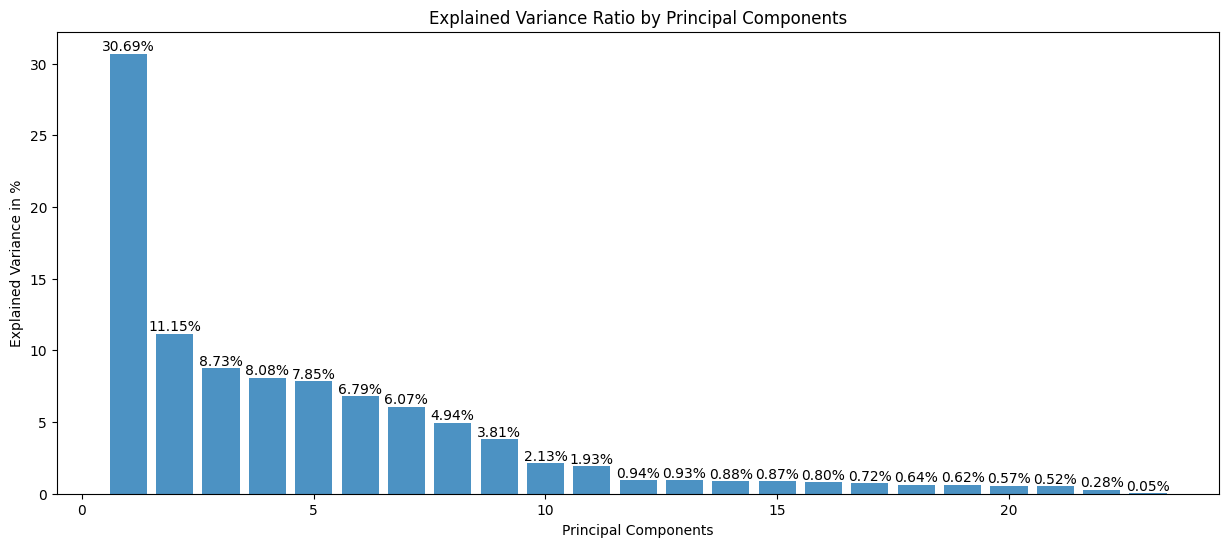

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df_to_standardize = df[continous_predictors]
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_to_standardize)
df_standardized = pd.DataFrame(standardized_data, columns=df_to_standardize.columns)
df_standardized.columns = [col + "_stand" for col in df_to_standardize.columns]

final_df = pd.concat([df_standardized, df[categorical_predictors]], axis=1)

pca = PCA(n_components=final_df.shape[1])
principalComponents = pca.fit_transform(final_df)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(15, 6))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.8, align='center')

for bar, value in zip(bars, explained_variance):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value * 100:.2f}%', ha='center', va='bottom')

plt.ylabel('Explained Variance in %')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

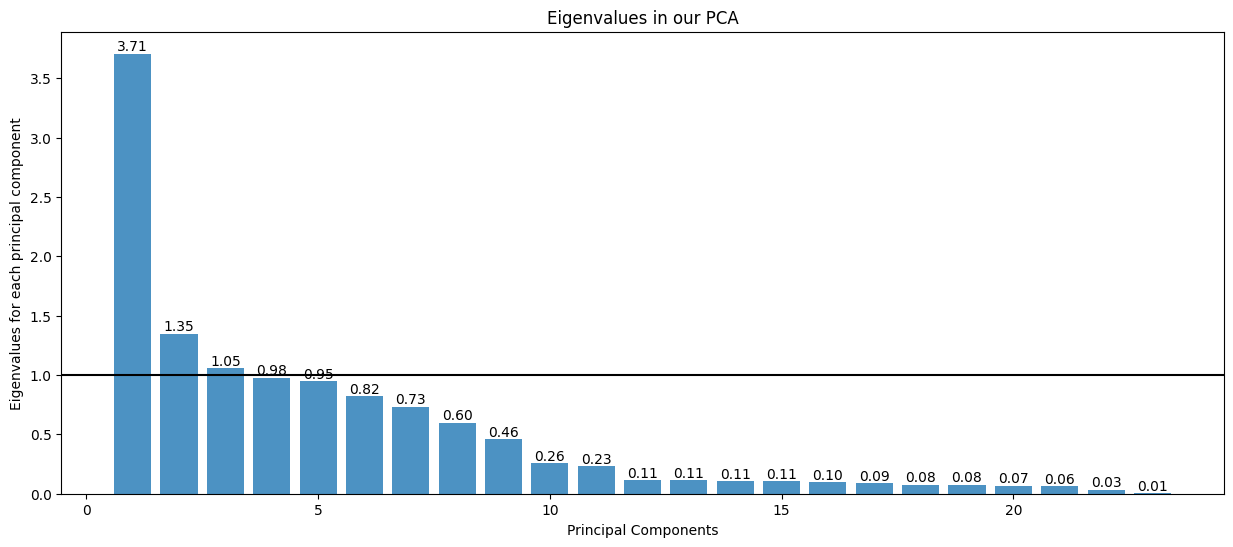

In [5]:
# eigenvalues
eigenvalues = pca.explained_variance_

plt.figure(figsize=(15, 6))
bars = plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.8, align='center')
plt.axhline(y=1, color='k', linestyle='-')  # Add a horizontal line at y=0

for bar, value in zip(bars, eigenvalues):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.ylabel('Eigenvalues for each principal component')
plt.xlabel('Principal Components')
plt.title('Eigenvalues in our PCA')
plt.show()

In [6]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(final_df)
loadings = pca.components_
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component #1', 'principal component #2', 'principal component #3'])
loadingsDf = pd.DataFrame(data=loadings.T, columns=['PC1_loading', 'PC2_loading', 'PC3_loading'], index=final_df.columns)

print("Principal Component Loadings:")
loadingsDf

Principal Component Loadings:


,PC1_loading,PC2_loading,PC3_loading
popularity_stand,-0.252125,-0.372608,0.195532
acousticness_stand,0.423047,-0.228273,0.049793
danceability_stand,-0.302775,-0.455510,-0.075046
energy_stand,-0.437717,0.318963,-0.075945
instrumentalness_stand,0.338174,0.110948,-0.102890
liveness_stand,-0.084413,0.340326,0.594835
loudness_stand,-0.456953,0.182203,-0.063981
speechiness_stand,-0.174260,-0.285347,0.632986
tempo_stand,-0.146637,0.345471,-0.109892
valence_stand,-0.276560,-0.133316,-0.357844


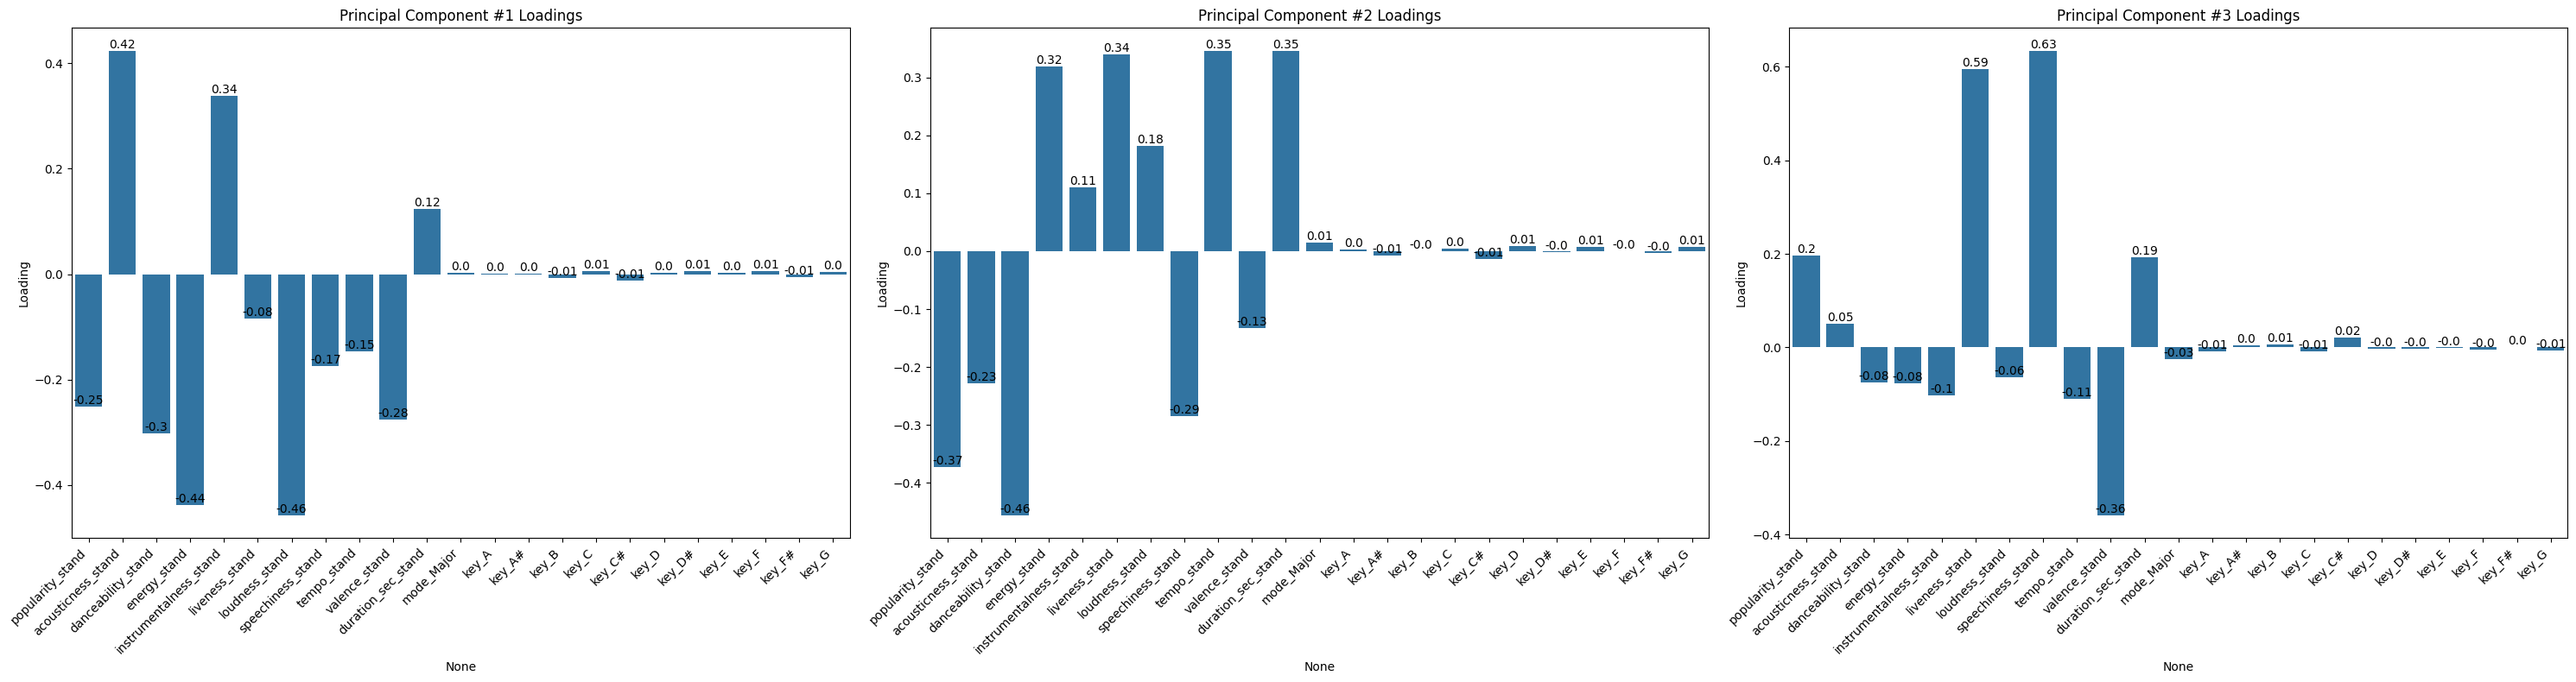

In [7]:
import seaborn as sns

loadingsDf = pd.DataFrame(data=loadings.T, columns=['PC1_loading', 'PC2_loading', 'PC3_loading'], index=final_df.columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))

for i in range(3):
    sns.barplot(x=loadingsDf.index, y=f'PC{i+1}_loading', data=loadingsDf, ax=axes[i])
    axes[i].set_title(f'Principal Component #{i+1} Loadings')
    axes[i].set_ylabel('Loading')
    
    axes[i].set_xticks(range(len(loadingsDf.index)))
    axes[i].set_xticklabels(loadingsDf.index, rotation=45, ha='right')

    for idx, value in enumerate(loadingsDf[f'PC{i+1}_loading']):
        axes[i].text(idx, value, round(value, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [8]:
# let's greedily choose the loadings
threshold = 0.35
sorted_loadings = loadingsDf.abs().sort_values(by=['PC1_loading', 'PC2_loading', 'PC3_loading'], ascending=False)

significant_variables_pc1 = sorted_loadings[sorted_loadings['PC1_loading'].abs() > threshold][['PC1_loading']].sort_values(by=['PC1_loading'], ascending=False)
significant_variables_pc2 = sorted_loadings[sorted_loadings['PC2_loading'].abs() > threshold][['PC2_loading']].sort_values(by=['PC2_loading'], ascending=False)
significant_variables_pc3 = sorted_loadings[sorted_loadings['PC3_loading'].abs() > threshold][['PC3_loading']].sort_values(by=['PC3_loading'], ascending=False)

print("Significant variables for PC1:")
print(significant_variables_pc1)
print("\nSignificant variables for PC2:")
print(significant_variables_pc2)
print("\nSignificant variables for PC3:")
print(significant_variables_pc3)

Significant variables for PC1:
                    PC1_loading
loudness_stand         0.456953
energy_stand           0.437717
acousticness_stand     0.423047

Significant variables for PC2:
                    PC2_loading
danceability_stand     0.455510
popularity_stand       0.372608

Significant variables for PC3:
                   PC3_loading
speechiness_stand     0.632986
liveness_stand        0.594835
valence_stand         0.357844


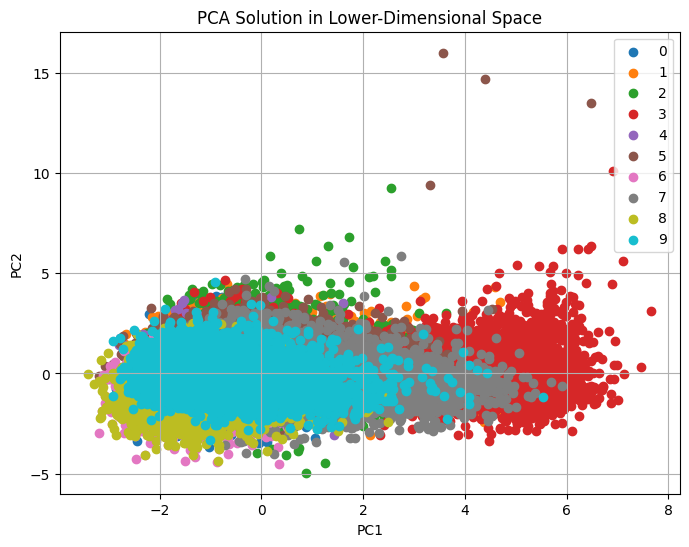

In [14]:
pca = PCA(n_components=2)

X = df.drop(columns=['genre_label'])
y = df['genre_label']

X_pca = pca.fit_transform(X, y)

# Plot the transformed data
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Solution in Lower-Dimensional Space')
plt.legend()
plt.grid(True)
plt.show()

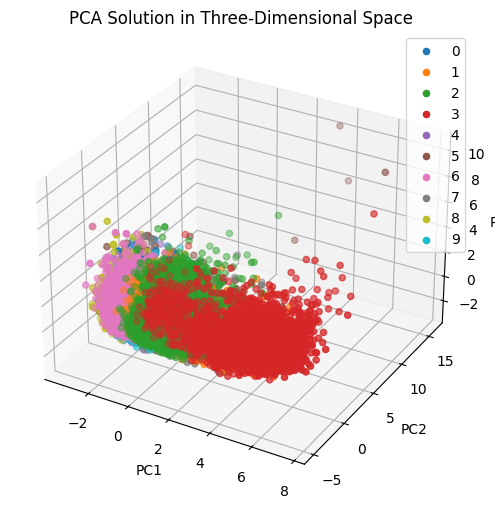

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X = df.drop(columns=['genre_label'])
y = df['genre_label']

X_pca = pca.fit_transform(X, y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(y):
    ax.scatter(X_pca[y == label, 0], X_pca[y == label, 1], X_pca[y == label, 2], label=label)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Solution in Three-Dimensional Space')
ax.legend()
plt.grid(True)
plt.show()

### One important remark is that this method might not be the best one, since we have labels. But it is already great, since I reduced the number of predictors from 23 to 8 most important ones.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df = pd.concat([final_df, df['genre_label']], axis=1)
# fit LDA using selected features
lda = LinearDiscriminantAnalysis()
lda.fit(df.drop(columns=['genre_label']), df['genre_label'])
feature_importance = lda.coef_[0]  # Coefficients associated with each feature

for feature, importance in zip(df.drop(columns=['genre_label']).columns.to_list(), feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: popularity_stand, Importance: 0.9415492384427924
Feature: acousticness_stand, Importance: -0.3750522496925395
Feature: danceability_stand, Importance: -0.2104460469659905
Feature: energy_stand, Importance: 0.12106782091637011
Feature: instrumentalness_stand, Importance: -0.3802066987029886
Feature: liveness_stand, Importance: -0.029162631262726956
Feature: loudness_stand, Importance: 0.41691648610702314
Feature: speechiness_stand, Importance: -0.09022002483264621
Feature: tempo_stand, Importance: -0.03618138231381687
Feature: valence_stand, Importance: -0.19170327326077802
Feature: duration_sec_stand, Importance: -0.17132256161503603
Feature: mode_Major, Importance: -0.005535485963540589
Feature: key_A, Importance: 0.17547584698160185
Feature: key_A#, Importance: -0.008003215399846025
Feature: key_B, Importance: 0.26586006254888617
Feature: key_C, Importance: 0.1696924608049547
Feature: key_C#, Importance: -0.015127650322002247
Feature: key_D, Importance: 0.13112466091831226
F

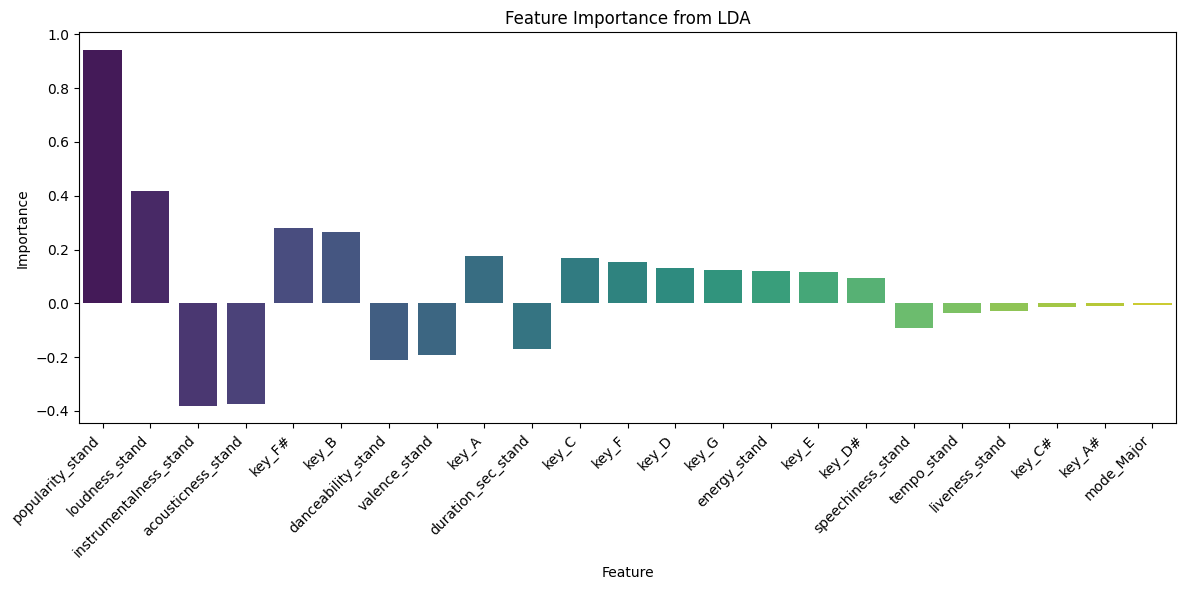

In [10]:
import matplotlib.pyplot as plt

sorted_features = sorted(zip(df.drop(columns=['genre_label']).columns, feature_importance), key=lambda x: abs(x[1]), reverse=True)
sorted_feature_names = [feature for feature, _ in sorted_features]
sorted_importance_values = [importance for _, importance in sorted_features]

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_feature_names, y=sorted_importance_values, hue=sorted_feature_names, palette="viridis", legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from LDA')
plt.tight_layout()
plt.show()

In [11]:
# Define a threshold for feature importance
threshold = 0.2  # Adjust this threshold based on your preference or analysis
selected_features = [feature for feature, importance in sorted_features if abs(importance) > threshold]

print("Selected Features:")
print(selected_features)

Selected Features:
['popularity_stand', 'loudness_stand', 'instrumentalness_stand', 'acousticness_stand', 'key_F#', 'key_B', 'danceability_stand']


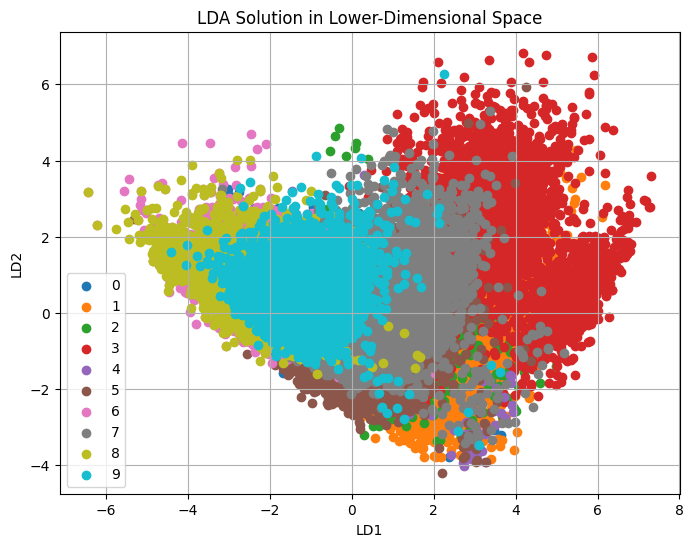

In [13]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

X = df.drop(columns=['genre_label'])
y = df['genre_label']

X_lda = lda.fit_transform(X, y)

# Plot the transformed data
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=label)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA Solution in Lower-Dimensional Space')
plt.legend()
plt.grid(True)
plt.show()

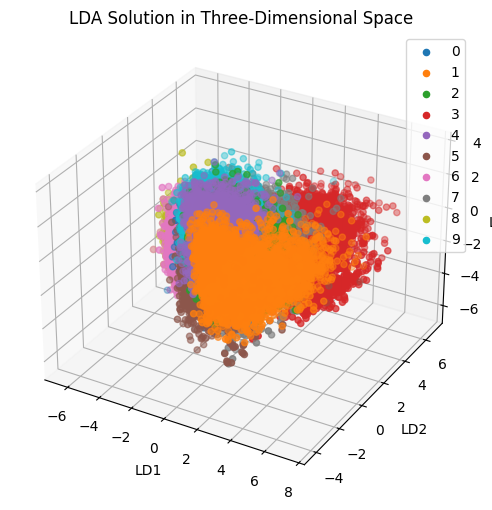

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)

X = df.drop(columns=['genre_label'])
y = df['genre_label']

X_lda = lda.fit_transform(X, y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(y):
    ax.scatter(X_lda[y == label, 0], X_lda[y == label, 1], X_lda[y == label, 2], label=label)

ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')
ax.set_title('LDA Solution in Three-Dimensional Space')
ax.legend()
plt.grid(True)
plt.show()